# Client & Subscription Insights Analysis

This project is part of the SkyGeni Data Engineer assignment, where I analyzed client, subscription, payment, and financial datasets to uncover key business insights. The goal was to answer questions related to industry renewal rates, client segmentation, inflation impact on renewals, and yearly payment trends.

Github link to code and files: https://github.com/ChelsaMJ/Client-Subscription-Insights-Analysis

## Import Libraries & Load Data

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Setting display options for better readability
pd.set_option('display.max_columns', None)

# Load all CSVs
industry_df = pd.read_csv("industry_client_details.csv")
subscription_df = pd.read_csv("subscription_information.csv")
payment_df = pd.read_csv("payment_information.csv")
financial_df = pd.read_csv("finanical_information.csv")

In [7]:
# Preview each dataset
print("Industry Data:")
display(industry_df.head())

print("Subscription Data:")
display(subscription_df.head())

print("Payment Data:")
display(payment_df.head())

print("Financial Data:")
display(financial_df.head())

Industry Data:


,client_id,company_size,industry,location
0,4280387012,Large,Finance Lending,Mumbai
1,2095513148,Small,Finance Lending,Chennai
2,7225516707,Medium,Finance Lending,New Delhi
3,8093537819,Large,Block Chain,Mumbai
4,4387541014,Medium,Hyper Local,Banglore


Subscription Data:


,client_id,subscription_type,start_date,end_date,renewed
0,1131383004,Yearly,2020-11-11,2021-11-11,False
1,4309371709,Monthly,2021-05-24,2021-06-23,True
2,3183675157,Yearly,2021-12-25,2022-12-25,True
3,5371694837,Monthly,2020-03-14,2020-04-13,True
4,5157113076,Monthly,2019-11-07,2019-12-07,False


Payment Data:


,client_id,payment_date,amount_paid,payment_method
0,6292156167,9/16/2019,447.0,Bank Transfer
1,7462725203,5/21/2018,379.7,Bank Transfer
2,4698004907,9/11/2021,435.1,Check
3,3510240337,12/7/2020,413.1,Check
4,7501599785,3/4/2019,61.1,Bank Transfer


Financial Data:


,Unnamed: 0,start_date,end_date,inflation_rate,gdp_growth_rate
0,0,2018-01-01,2018-03-31,5.77,3.51
1,1,2018-04-01,2018-06-30,1.17,2.15
2,2,2018-07-01,2018-09-30,1.56,1.82
3,3,2018-10-01,2018-12-31,2.78,2.43
4,4,2019-01-01,2019-03-31,6.91,3.44


## Exploratory Data Analysis (EDA)

In [9]:
# Checking data info
print("Industry Data Info:")
industry_df.info()

print("\nSubscription Data Info:")
subscription_df.info()

print("\nPayment Data Info:")
payment_df.info()

print("\nFinancial Data Info:")
financial_df.info()

Industry Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   client_id     100 non-null    int64 
 1   company_size  100 non-null    object
 2   industry      100 non-null    object
 3   location      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB

Subscription Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   client_id          100 non-null    int64 
 1   subscription_type  100 non-null    object
 2   start_date         100 non-null    object
 3   end_date           100 non-null    object
 4   renewed            100 non-null    bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 3.4+ KB

Payment Data Info:
<class 'pandas.core.frame.DataFrame'>
R

In [10]:
# Checking for missing values
print("\nMissing values in each file:\n")
print("\nIndustry:\n", industry_df.isnull().sum())
print("\nSubscription:\n", subscription_df.isnull().sum())
print("\nPayment:\n", payment_df.isnull().sum())
print("\nFinancial:\n", financial_df.isnull().sum())


Missing values in each file:


Industry:
 client_id       0
company_size    0
industry        0
location        0
dtype: int64

Subscription:
 client_id            0
subscription_type    0
start_date           0
end_date             0
renewed              0
dtype: int64

Payment:
 client_id         0
payment_date      0
amount_paid       0
payment_method    0
dtype: int64

Financial:
 Unnamed: 0         0
start_date         0
end_date           0
inflation_rate     0
gdp_growth_rate    0
dtype: int64


## Data Cleaning & Processing

In [12]:
# Convert dates to datetime format
payment_df['payment_date'] = pd.to_datetime(payment_df['payment_date'])

In [13]:
# Preview again to see changes

print("Payment Data:")
display(payment_df.head())

Payment Data:


,client_id,payment_date,amount_paid,payment_method
0,6292156167,2019-09-16,447.0,Bank Transfer
1,7462725203,2018-05-21,379.7,Bank Transfer
2,4698004907,2021-09-11,435.1,Check
3,3510240337,2020-12-07,413.1,Check
4,7501599785,2019-03-04,61.1,Bank Transfer


## Answering Assignment Questions

#### Q1: How many finance lending and blockchain clients does the organization have?

In [52]:
# Count unique client_ids for each industry
finance_clients = industry_df[industry_df['industry'] == 'Finance Lending']['client_id'].nunique()
blockchain_clients = industry_df[industry_df['industry'] == 'Block Chain']['client_id'].nunique()

print(f"Finance Lending Clients: {finance_clients}")
print(f"Block Chain Clients: {blockchain_clients}")

Finance Lending Clients: 22
Block Chain Clients: 25


#### Q2: Which industry in the organization has the highest renewal rate?

In [62]:
# Merge industry and subscription data on client_id
merged_df = pd.merge(subscription_df, industry_df, on='client_id', how='inner')

# Calculate renewal rate for each industry
industry_renewal_rate = merged_df.groupby('industry')['renewed'].mean().sort_values(ascending=False)

# Display
print("Renewal rates by industry:")
print(industry_renewal_rate)

# Get the industry with the highest renewal rate
top_industry = industry_renewal_rate.idxmax()
top_rate = industry_renewal_rate.max()

print(f"\nIndustry with highest renewal rate is {top_industry} - {top_rate:.2%}")

Renewal rates by industry:
industry
Gaming             0.727273
AI                 0.636364
Finance Lending    0.545455
Hyper Local        0.450000
Block Chain        0.440000
Name: renewed, dtype: float64

Industry with highest renewal rate is Gaming - 72.73%


#### Q3: What was the average inflation rate when their subscriptions were renewed?

In [20]:
# Filter only renewed subscriptions
renewed_df = subscription_df[subscription_df['renewed'] == True].copy()

# Function to match subscription end_date with financial period
def find_inflation(date):
    match = financial_df[(financial_df['start_date'] <= date) & (financial_df['end_date'] >= date)]
    if not match.empty:
        return match['inflation_rate'].values[0]
    return None

# Apply function
renewed_df['inflation_rate'] = renewed_df['end_date'].apply(find_inflation)

# Calculate average
avg_inflation = renewed_df['inflation_rate'].dropna().mean()

print(f"Average inflation rate at time of renewal: {avg_inflation:.2f}%")

Average inflation rate at time of renewal: 4.31%


#### Q4: What is the median amount paid each year for all payment methods? 

Median payment amount each year by method:
    year payment_method  amount_paid
0   2018  Bank Transfer       281.65
1   2018          Check       216.60
2   2018    Credit Card       229.15
3   2019  Bank Transfer       184.20
4   2019          Check       410.20
5   2019    Credit Card       401.90
6   2020  Bank Transfer       225.10
7   2020          Check       413.10
8   2020    Credit Card       285.25
9   2021  Bank Transfer       255.30
10  2021          Check       435.10
11  2021    Credit Card       208.70
12  2022  Bank Transfer       196.50
13  2022          Check       275.50
14  2022    Credit Card       326.20





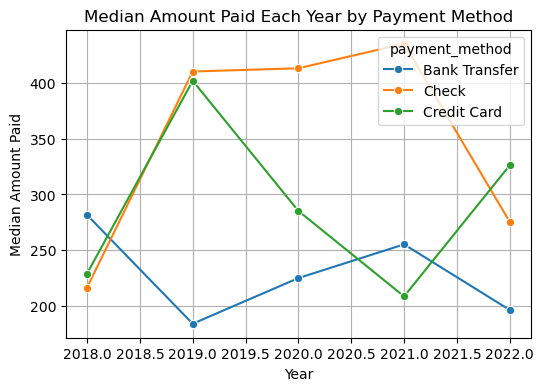

In [22]:
# Extract year from payment date
payment_df['year'] = payment_df['payment_date'].dt.year

# Group by year and calculate median for each payment method
median_by_year_method = payment_df.groupby(['year', 'payment_method'])['amount_paid'].median().reset_index()

print("Median payment amount each year by method:")
print(median_by_year_method)

print("\n\n")

# Simple plot
plt.figure(figsize=(6, 4))
sns.lineplot(data=median_by_year_method, x='year', y='amount_paid', hue='payment_method', marker='o')
plt.title('Median Amount Paid Each Year by Payment Method')
plt.ylabel('Median Amount Paid')
plt.xlabel('Year')
plt.grid(True)
plt.show()

## Export Result Tables

In [24]:
# Saving results to CSVs
industry_renewal_rate.to_csv("industry_renewal_rates.csv", index=True)
median_by_year_method.to_csv("median_payment_by_year_method.csv", index=False)
renewed_df[['client_id', 'end_date', 'inflation_rate']].to_csv("inflation_at_renewal.csv", index=False)